In [21]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt

import datetime
import json
import pickle


In [22]:
def get_soup(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    return page.status_code, soup

def get_date(soup, d, country_name, table_id=2, eb_id=1):
    tables = []
    for tb in soup.find_all('table'):
        rows = tb.find_all('tr')
        if len(rows)>3:
            data = []
            for row in rows:
                cols = row.find_all('td')
                cols = [ele.text.strip() for ele in cols]
                data.append([ele for ele in cols if ele])
            tables.append(data)
    
    wanted_table = tables[table_id]
    country_list = [c.replace('\n ','').lower() for c in wanted_table[0]]
    country_name = country_name.lower()
    country_ind = [i for i,c in enumerate(country_list) if country_name in c]
    country_id = country_ind[0]
    res = wanted_table[eb_id][country_id]
    
    if res=='C':
        res_d = d
    elif res=='U':
        res_d = ''
    else:
        DD = int(res[:2])
        MON = res[2:5]
        YYYY = 2000+int(res[-2:])
        if YYYY>2030:
            YYYY-=1000
        MM = M_abbr.index(MON)+1
        res_d = datetime.date(YYYY,MM,DD)
    return res_d

In [23]:
M=['january','february','march','april','may','june','july','august','september','october','november','december']
M_abbr = [a[:3].upper() for a in M]

In [59]:
eb_id = 3

In [60]:
x1 = []
row_days1 = []
cn_days1 = []
in_days1 = []

for yr in [2015, 2016, 2017, 2018, 2019, 2020]:
    bd, ed = 0, 12
    if yr==2015:
        bd=9
    if yr==2020:
        ed=4
    for i in range(bd, 12):
        m = M[i]
        fy = yr if i<9 else yr+1
        url = f'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{fy}/visa-bulletin-for-{m}-{yr}.html'
        s, soup = get_soup(url)
        if s==404:
            url = f'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{fy}/visa-bulletin-{m}-{yr}.html'
            s, soup = get_soup(url)            
        
        d = datetime.date(yr, i+1, 1)

        try:
            res_ROW   = get_date(soup,d,'all', table_id=2, eb_id=eb_id)
            res_CHINA = get_date(soup,d,'china', table_id=2, eb_id=eb_id)
            res_INDIA = get_date(soup,d,'india', table_id=2, eb_id=eb_id)
        except:
            break
            
        x1.append(d)
        row_days1.append(res_ROW)
        cn_days1.append(res_CHINA)
        in_days1.append(res_INDIA)
        
        print(d,' ',res_ROW, res_CHINA, res_INDIA)
    #break
        
        

2015-10-01   2015-08-15 2011-10-15 2004-03-08
2015-11-01   2015-08-15 2012-01-01 2004-04-01
2015-12-01   2015-09-01 2012-04-15 2004-04-22
2016-01-01   2015-10-01 2012-07-01 2004-05-15
2016-02-01   2015-10-01 2012-10-01 2004-06-15
2016-03-01   2016-01-01 2013-06-01 2004-07-15
2016-04-01   2016-02-15 2013-08-15 2004-08-08
2016-05-01   2016-02-15 2013-08-15 2004-09-01
2016-06-01   2016-02-15 2010-01-01 2004-09-22
2016-07-01   2016-03-01 2010-01-01 2004-10-22
2016-08-01   2016-03-15 2010-01-01 2004-11-08
2016-09-01   2016-05-01 2010-01-01 2005-02-15
2016-10-01   2016-06-01 2013-01-22 2005-03-01
2016-11-01   2016-07-01 2013-04-15 2005-03-08
2016-12-01   2016-07-01 2013-07-01 2005-03-15
2017-01-01   2016-08-01 2013-09-08 2005-03-15
2017-02-01   2016-10-01 2013-10-01 2005-03-22
2017-03-01   2016-12-01 2014-03-15 2005-03-22
2017-04-01   2017-02-15 2014-08-15 2005-03-24
2017-05-01   2017-03-15 2014-10-01 2005-03-25
2017-06-01   2017-04-15 2014-10-01 2005-05-15
2017-07-01   2017-06-08 2012-01-01

In [61]:
x0 = []
row_days0 = []
cn_days0 = []
in_days0 = []

for yr in range(2004,2016):
    if yr==2015:
        ed=9
    else:
        ed=12
    for i in range(0,ed):
        m = M[i]
        fy = yr if i<9 else yr+1
        url = f'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{fy}/visa-bulletin-for-{m}-{yr}.html'
        s, soup = get_soup(url)
        if s==404:
            url = f'https://travel.state.gov/content/travel/en/legal/visa-law0/visa-bulletin/{fy}/visa-bulletin-{m}-{yr}.html'
            s, soup = get_soup(url)            

        d = datetime.date(yr, i+1, 1)

        try:
            res_ROW   = get_date(soup,d,'all', table_id=1, eb_id=eb_id)
            res_CHINA = get_date(soup,d,'china', table_id=1, eb_id=eb_id)
            res_INDIA = get_date(soup,d,'india', table_id=1, eb_id=eb_id)
        except:
            break
            
        x0.append(d)
        row_days0.append(res_ROW)
        cn_days0.append(res_CHINA)
        in_days0.append(res_INDIA)
        
        print(d,' ',res_ROW, res_CHINA, res_INDIA)
        
        

2007-01-01   2002-08-01 2002-08-01 2001-05-08
2008-01-01   2002-10-15 2001-11-01 2001-05-01
2008-02-01   2002-11-01 2001-11-15 2001-05-08
2008-03-01   2005-01-01 2002-12-01 2001-08-01
2008-04-01   2005-07-01 2003-02-08 2001-10-01
2008-05-01   2006-03-01 2003-03-22 2001-11-01
2008-06-01   2006-03-01 2003-03-22 2001-11-01
2008-07-01     
2008-08-01     
2008-09-01     
2008-10-01   2005-01-01 2001-10-01 2001-07-01
2008-11-01   2005-05-01 2002-02-01 2001-10-01
2008-12-01   2005-05-01 2002-02-01 2001-10-01
2009-01-01   2005-05-01 2002-06-01 2001-10-15
2009-02-01   2005-05-01 2002-10-01 2001-10-15
2009-03-01   2005-05-01 2002-10-22 2001-10-15
2009-04-01   2003-03-01 2003-03-01 2001-11-01
2009-05-01     
2009-06-01     
2010-01-01   2002-08-01 2002-08-01 2001-06-22
2010-02-01   2002-09-22 2002-09-22 2001-06-22
2010-03-01   2002-12-15 2002-12-15 2001-07-01
2010-04-01   2003-02-01 2003-02-01 2001-09-08
2010-05-01   2003-04-22 2003-04-22 2001-10-01
2010-06-01   2003-06-22 2003-06-22 2001-10-22


In [62]:
x=x0+x1
row_days = row_days0+row_days1
cn_days = cn_days0+cn_days1
in_days = in_days0+in_days1

In [63]:
eb_fa = {'date':x,
          f'Row-EB{eb_id}':row_days,
          f'China-EB{eb_id}':cn_days,
          f'India-EB{eb_id}':in_days}

In [64]:
df = pd.DataFrame.from_dict(eb_fa)

In [65]:
df.to_csv(f'./../data/eb{eb_id}_final_action_days.csv',index=False)

In [66]:
with open(f'./../data/eb{eb_id}_fa.pk', 'wb') as f:
    pickle.dump(df,f)

Text(0.5, 1.0, 'EB1 Final Action Date')

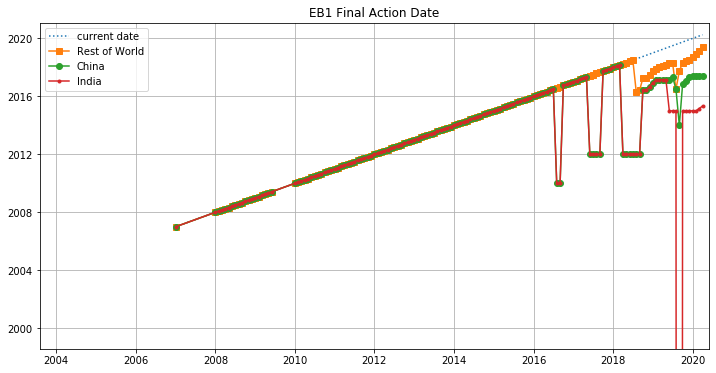

In [58]:
plt.figure(figsize=(12,6))

plt.plot_date(x,x,':',xdate = True, ydate=True,label='current date')
plt.plot_date(x,df[f'Row-EB{eb_id}'],'s-',xdate = True, ydate=True,label='Rest of World')
plt.plot_date(x,df[f'China-EB{eb_id}'],'o-',xdate = True, ydate=True,label='China')
plt.plot_date(x,df[f'India-EB{eb_id}'],'.-',xdate = True, ydate=True,label='India')
#plt.plot_date([datetime.date(2019,11,1),datetime.date(2020,2,1)],[datetime.date(2018,6,1),datetime.date(2018,12,1)],':',color='#ee7700')
#plt.plot_date([datetime.date(2019,11,1),datetime.date(2020,2,1)],[datetime.date(2017,2,1),datetime.date(2017,8,1)],':',color='green')
#plt.plot_date([datetime.date(2019,11,1),datetime.date(2020,2,1)],[datetime.date(2015,1,1),datetime.date(2015,1,1)],':',color='red')

ylim = [datetime.date(1998,8,1),datetime.date(2021,2,1)]
xlim = [datetime.date(2003,8,1),datetime.date(2020,6,1)]

plt.ylim(ylim)
plt.xlim(xlim)
plt.grid('on')
plt.legend()
#plt.title('Estimation of Xiang''s time line')
#plt.title('EB1 catastrophe. Table B')
plt.title(f'EB{eb_id} Final Action Date')

#plt.plot_date([datetime.date(2017,5,30),datetime.date(2017,5,30)],ylim,'k:')
#plt.plot_date(xlim,[datetime.date(2017,5,30),datetime.date(2017,5,30)],'k:')


In [ ]:
with open(f'eb1_fa.pk', 'rb') as f:
    eb1_fa = pickle.load(f)
with open(f'eb2_fa.pk', 'rb') as f:
    eb2_fa = pickle.load(f)
with open(f'eb3_fa.pk', 'rb') as f:
    eb3_fa = pickle.load(f)    

In [ ]:
plt.figure(figsize=(12,6))

plt.plot_date(eb1_fa['x'],eb1_fa['x'],':',xdate = True, ydate=True,label='current')
plt.plot_date(eb1_fa['x'],eb1_fa['cn'],'s-',xdate = True, ydate=True,label='EB1-China')
plt.plot_date(eb2_fa['x'],eb2_fa['cn'],'o-',xdate = True, ydate=True,label='EB2-China')
plt.plot_date(eb3_fa['x'],eb3_fa['cn'],'d-',xdate = True, ydate=True,label='EB3-China')

ylim = [datetime.date(1998,8,1),datetime.date(2021,2,1)]
xlim = [datetime.date(2003,8,1),datetime.date(2020,2,1)]

plt.ylim(ylim)
plt.xlim(xlim)
plt.grid('on')
plt.legend()
#plt.title('Estimation of Xiang''s time line')
#plt.title('EB1 catastrophe. Table B')
plt.title(f'China EB Final Action Date')

#plt.plot_date([datetime.date(2017,5,30),datetime.date(2017,5,30)],ylim,'k:')
#plt.plot_date(xlim,[datetime.date(2017,5,30),datetime.date(2017,5,30)],'k:')
